In [188]:
import pandas as pd

In [189]:
lol = pd.read_csv('sample_ChallengerKDA.csv')
lol.drop(['Unnamed: 0'],axis=1,inplace=True)
lol

,gameResult,TOP,JUNGLE,MIDDLE,BOTTOM,SUPPORT
0,1,2.59,3.42,3.03,3.53,2.48
1,1,2.17,2.02,3.53,2.56,3.20
2,1,2.93,3.42,3.53,2.82,3.25
3,1,3.09,2.72,3.53,2.91,2.66
4,1,1.87,3.54,3.53,3.12,3.05
...,...,...,...,...,...,...
989,0,1.64,2.28,2.91,1.86,2.72
990,1,2.09,2.28,1.71,1.86,2.72
991,0,1.96,3.10,2.16,1.86,2.72
992,1,1.56,3.27,3.53,2.61,2.72


Text(0.5, 1.0, 'Count plot - Game Result')

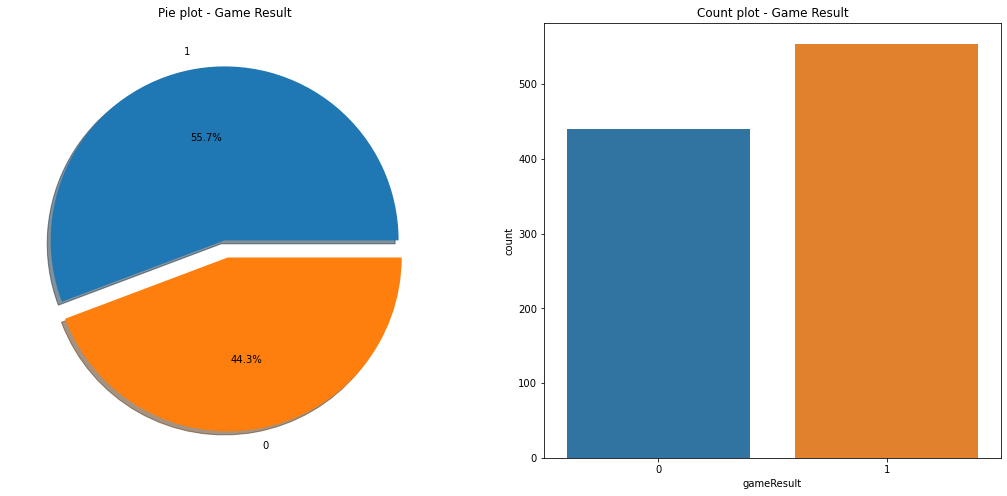

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, 2, figsize=(18, 8))

lol['gameResult'].value_counts().plot.pie(explode= [0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Game Result')
ax[0].set_ylabel('')
sns.countplot('gameResult', data=lol, ax=ax[1])
ax[1].set_title('Count plot - Game Result')

In [191]:
pd.crosstab(lol['JUNGLE'], lol['gameResult'], margins=True)

gameResult,0,1,All
JUNGLE,,,
1.4,1,0,1
1.6,3,1,4
1.63,0,2,2
1.71,2,0,2
1.73,1,1,2
...,...,...,...
5.03,1,10,11
5.16,4,8,12
5.43,1,0,1


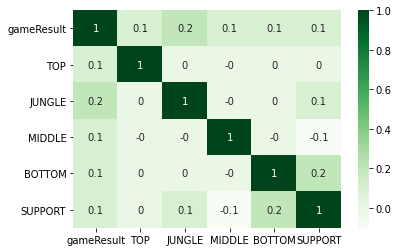

In [192]:
correlation_matrix = lol.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='Greens')

In [193]:
lol['TOP'].unique()

array([2.59, 2.17, 2.93, 3.09, 1.87, 2.48, 1.6 , 2.27, 2.02, 2.82, 2.54,
       3.3 , 1.85, 2.61, 2.75, 2.22, 3.53, 1.79, 2.72, 2.43, 1.48, 2.32,
       1.53, 2.11, 2.44, 2.9 , 3.98, 1.04, 3.27, 2.62, 1.76, 1.64, 2.52,
       2.5 , 3.11, 2.13, 2.3 , 2.42, 2.65, 1.95, 1.65, 3.06, 1.63, 1.9 ,
       2.14, 2.46, 1.59, 2.29, 4.31, 3.13, 3.18, 2.68, 1.36, 1.74, 1.41,
       3.  , 3.42, 1.99, 2.53, 1.98, 2.15, 2.57, 1.73, 1.86, 2.85, 3.51,
       2.33, 3.74, 3.69, 2.26, 1.88, 2.77, 2.01, 1.56, 2.21, 1.35, 3.2 ,
       2.16, 2.55, 1.75, 1.77, 3.05, 3.24, 1.71, 2.35, 2.91, 1.66, 2.2 ,
       2.06, 3.25, 3.66, 2.88, 2.25, 2.24, 3.35, 1.1 , 1.97, 1.81, 2.67,
       2.  , 2.51, 2.86, 3.04, 3.08, 2.19, 2.79, 1.37, 2.47, 3.38, 2.4 ,
       1.96, 2.49, 2.09, 1.44, 2.73, 2.45, 3.84, 4.15, 2.81, 3.57, 2.63,
       3.19, 2.58, 2.74, 2.98, 2.12, 2.64, 3.61, 2.05, 4.14, 2.56, 2.66,
       3.75, 3.37, 2.41, 2.89, 2.95, 1.25, 2.8 , 2.04, 1.67, 1.51, 3.73,
       2.23, 2.99, 2.69, 5.06, 1.42, 3.33, 4.22])

In [194]:
lol.head()

,gameResult,TOP,JUNGLE,MIDDLE,BOTTOM,SUPPORT
0,1,2.59,3.42,3.03,3.53,2.48
1,1,2.17,2.02,3.53,2.56,3.20
2,1,2.93,3.42,3.53,2.82,3.25
3,1,3.09,2.72,3.53,2.91,2.66
4,1,1.87,3.54,3.53,3.12,3.05


In [195]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(lol['TOP'])
lol['TOP'] = le.transform(lol['TOP'])
le.fit(lol['JUNGLE'])
lol['JUNGLE'] = le.transform(lol['JUNGLE'])
le.fit(lol['MIDDLE'])
lol['MIDDLE'] = le.transform(lol['MIDDLE'])
le.fit(lol['BOTTOM'])
lol['BOTTOM'] = le.transform(lol['BOTTOM'])
le.fit(lol['SUPPORT'])
lol['SUPPORT'] = le.transform(lol['SUPPORT'])



In [196]:

lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   gameResult  994 non-null    int64
 1   TOP         994 non-null    int32
 2   JUNGLE      994 non-null    int32
 3   MIDDLE      994 non-null    int32
 4   BOTTOM      994 non-null    int32
 5   SUPPORT     994 non-null    int32
dtypes: int32(5), int64(1)
memory usage: 27.2 KB


In [197]:
from sklearn.model_selection import train_test_split

X = lol[['TOP','JUNGLE','MIDDLE','BOTTOM','SUPPORT']]
# X = lol[['oChamp2','oChamp3','oChamp4','oChamp5','eChamp2','eChamp3','eChamp4','eChamp5']]
y = lol['gameResult']

X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, test_size=0.201, random_state=13)

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.67


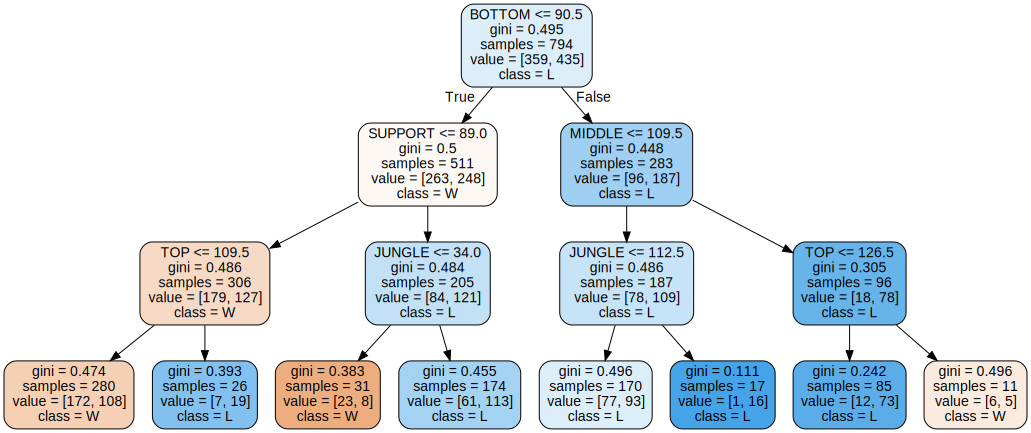

In [199]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(dt, feature_names=X_train.columns, class_names=['W','L'], rounded=True, filled=True))

In [200]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=13, solver='liblinear')
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))

0.64


In [201]:
lol

,gameResult,TOP,JUNGLE,MIDDLE,BOTTOM,SUPPORT
0,1,85,96,113,123,44
1,1,51,10,138,62,98
2,1,110,96,138,84,100
3,1,119,50,138,91,60
4,1,30,100,138,107,87
...,...,...,...,...,...,...
989,0,16,22,105,14,64
990,1,44,22,14,14,64
991,0,34,78,44,14,64
992,1,12,88,138,67,64


In [202]:
# import numpy as np
# Zed,Rammus,Orianna,Ezreal,Yuumi
# Gangplank,Vollbear,Zoe,Kai'Sa,Blitzcrank
# thisPic = np.array([[95, 14, 58, 72, 48, 60,]])
# print('this Game : ', lr.predict_proba(thisPic)[0,1])